# Imports

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
path = (r'Shipwreck Prediction /Dataset/train.csv')
df = pd.read_csv(path)
df_t=pd.read_csv(r'/workspaces/ML-Models/Shipwreck Prediction /Dataset/test.csv')

In [4]:
print("Train DataFrame :")
df.head()

Train DataFrame :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Move the ground truth to the end of the dataframe - for clarity
grnd_truth = 'Survived'
columns = [col for col in df.columns if col != grnd_truth]
df = df[columns+[grnd_truth]]

In [6]:
df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0


In [7]:
print('Test DataFrame : ')
df_t.head()

Test DataFrame : 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [11]:
df['Survived'].unique()

array([0, 1])

# Exploratory Data Analysis

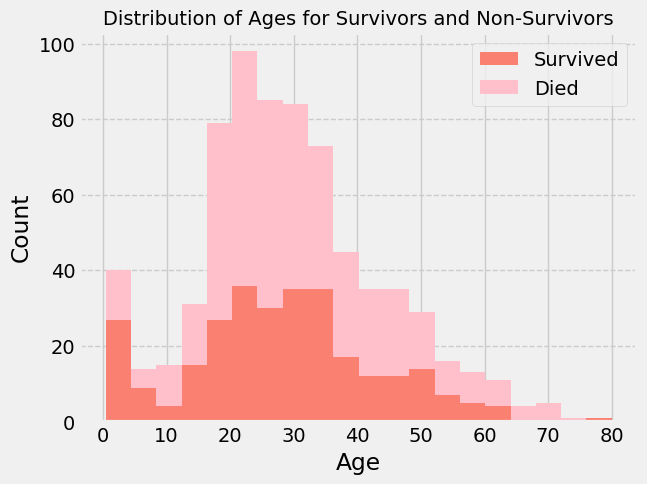

In [12]:
#Histogram: Visualize which age group of people survived -(Historgrams take only numerical input)
age_survived = df[df['Survived'] == 1]['Age'].dropna()
age_died = df[df['Survived'] == 0]['Age'].dropna()
plt.style.use('fivethirtyeight')
plt.hist([age_survived,age_died],bins=20,stacked=True,color=['salmon','pink'],label=['Survived','Died'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages for Survivors and Non-Survivors',fontsize=14)
plt.grid(axis='y',linestyle='--')
plt.legend()
plt.show()
plt.show()

In [13]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#Expaination for Donut Chart
fc=df['Embarked'].value_counts()
fc.index

Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

In [16]:
# For donut chart there shouldnt be any null values in the variables.
df['Embarked'].dropna(inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

/tmp/ipykernel_43/1261702038.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


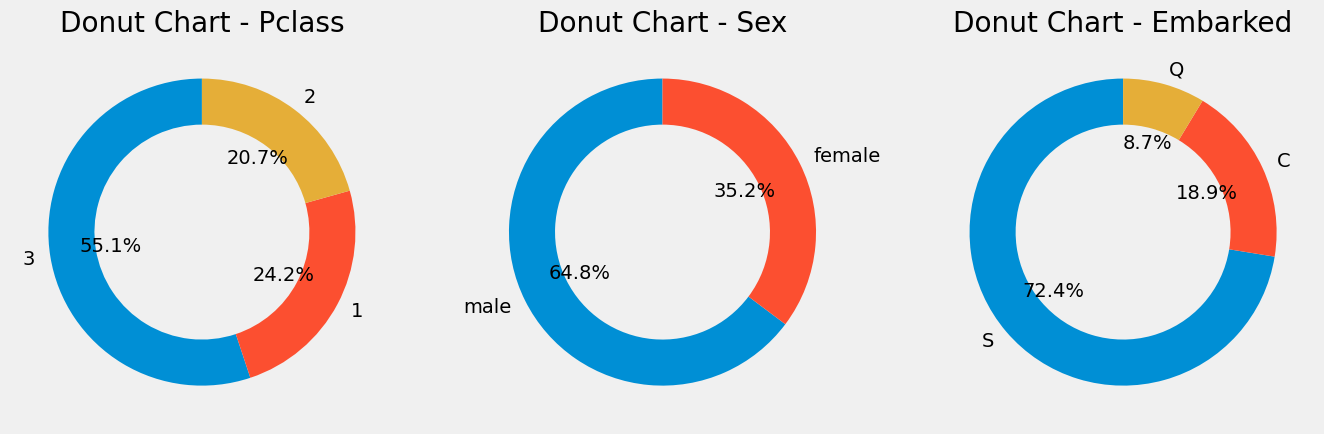

In [17]:
#Donut chart - to visualize the categorical variables of the dataset
selected_features = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(1, len(selected_features), figsize=(15, 5))
for i, feature in enumerate(selected_features):
    feature_counts = df[feature].value_counts()
    axes[i].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    axes[i].set_title(f'Donut Chart - {feature}')
plt.style.use('seaborn')
plt.show()

In [18]:
df['Age'].dtype

dtype('float64')

In [19]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [20]:
#Numerical variables in the dataset
columns = df.columns
df_numerical=[]
for col in columns:
    if(df[col].dtype == 'int64' or df[col].dtype == 'float64') :
        df_numerical.append(col)
print(df_numerical)    
df_numerical = df[df_numerical]

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


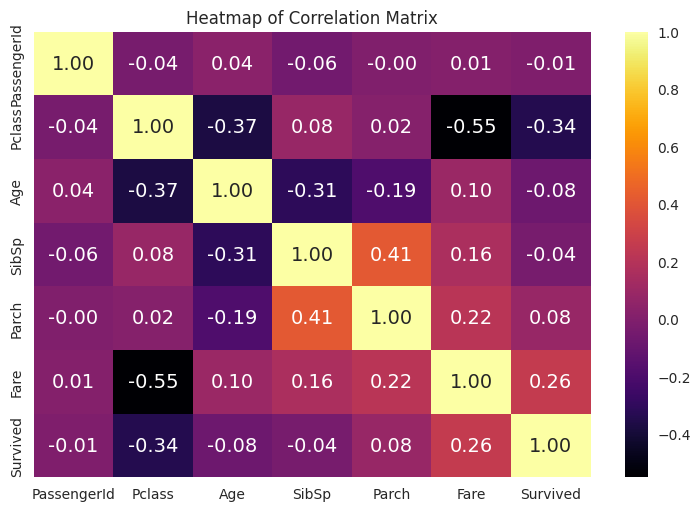

In [21]:
#Correlation Matrix Heatmap to visualize the relationships between the numerical variables .
#It ranges from (-1,1) 
#1: Perfect positive correlation -> a increases as b increases
# 0: No correlation
# -1: Perfect negative correlation -> a decreases as b increases
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='inferno',fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

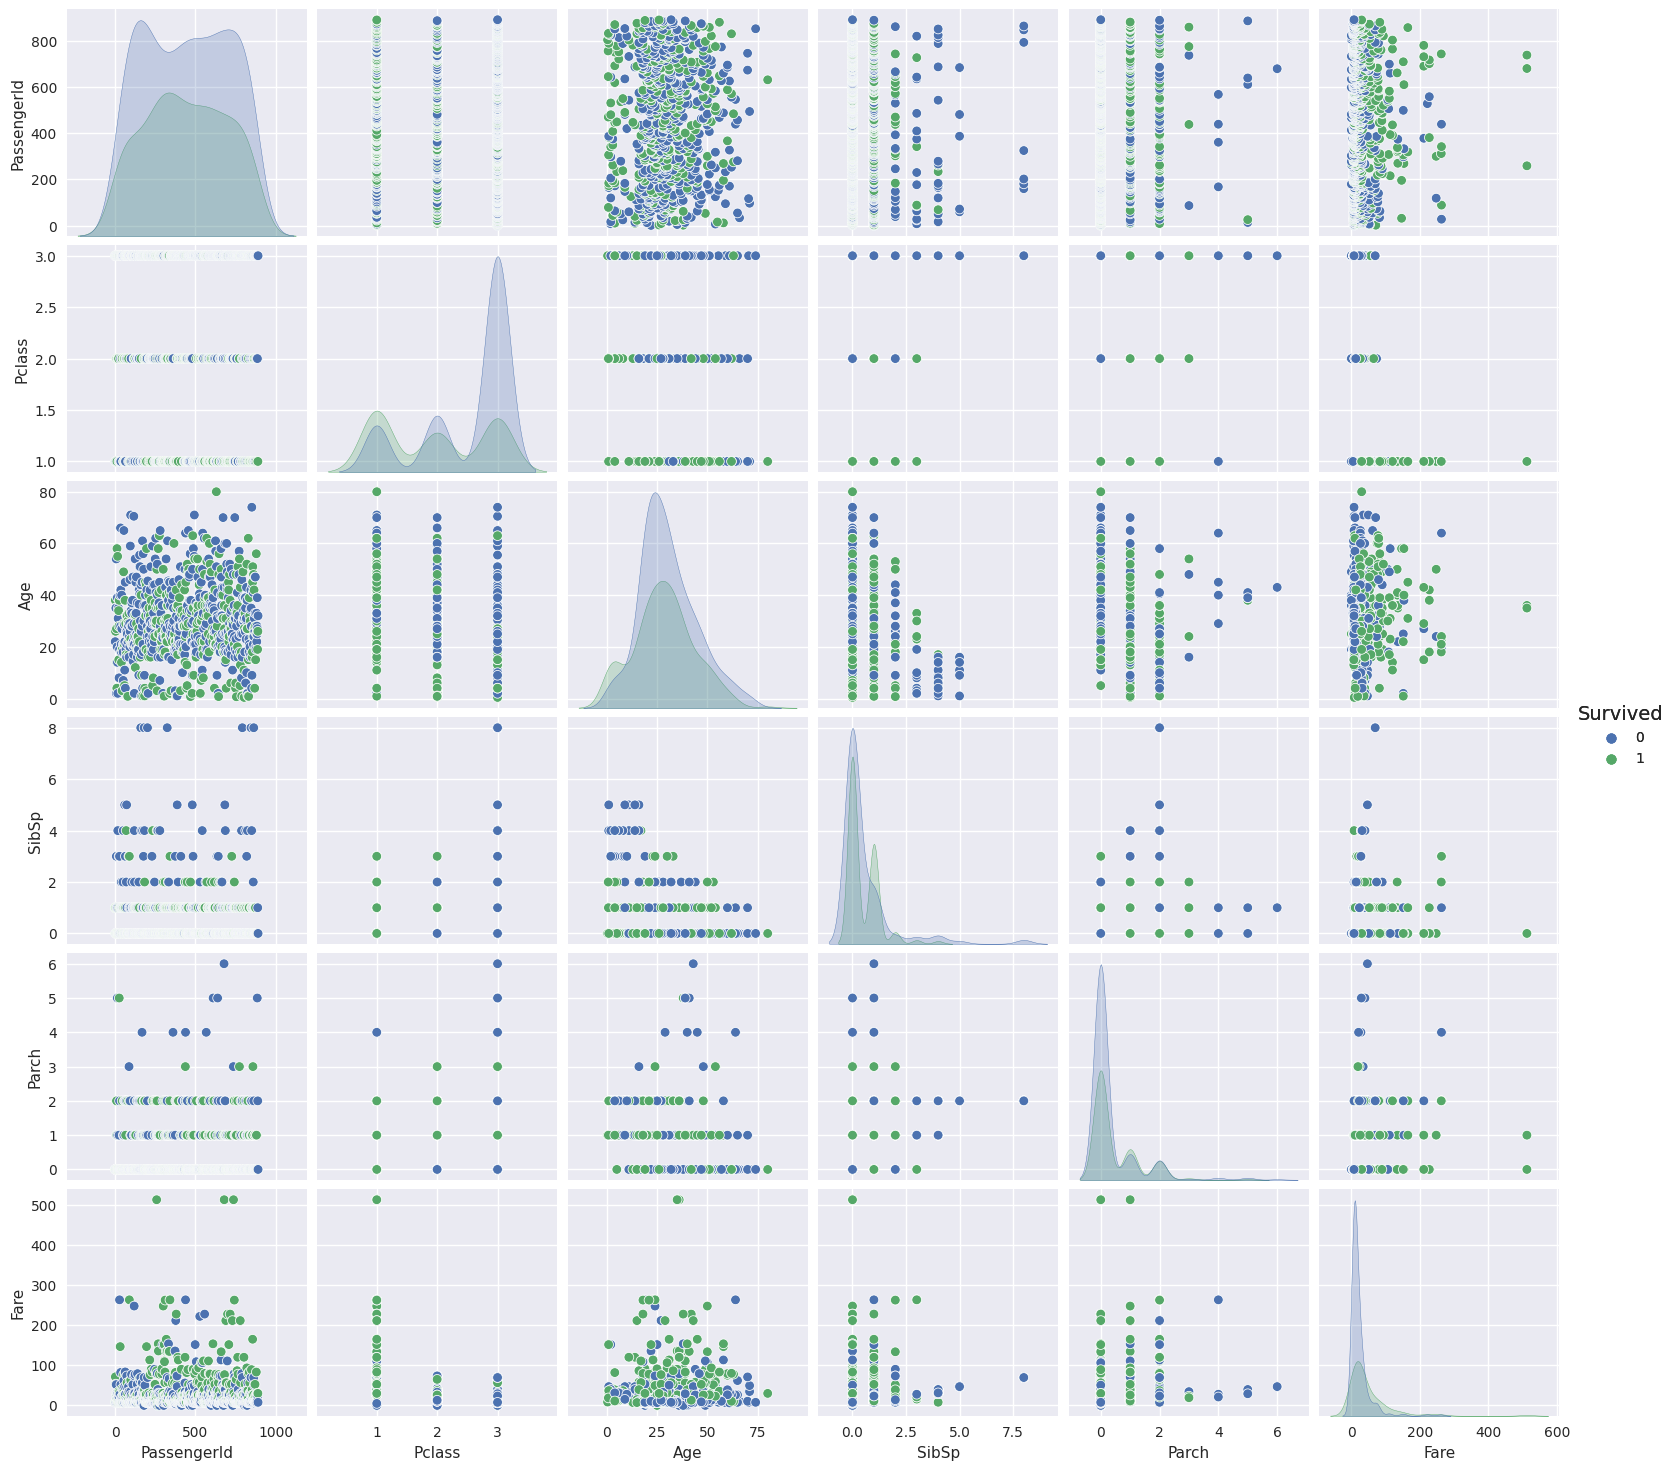

In [22]:
#Pair-Plot : Visualize the relationships between all numerical features
pair_plot=sns.pairplot(df_numerical, hue='Survived', diag_kind='kde')
pair_plot.add_legend()
plt.show()

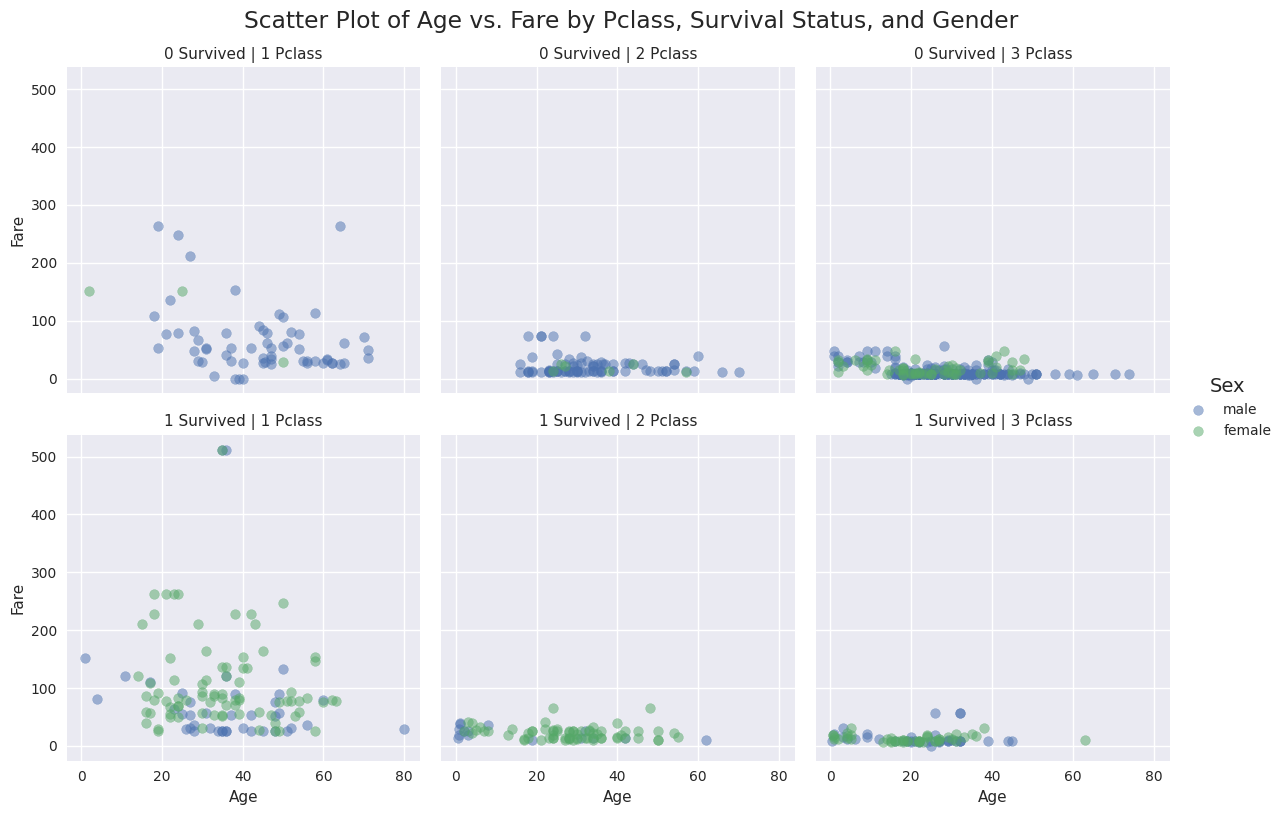

In [23]:
g = sns.FacetGrid(data=df, col='Pclass', row='Survived', hue='Sex', height=4)
g.map(plt.scatter, 'Age', 'Fare', alpha=0.5)
g.add_legend()
g.set_axis_labels('Age', 'Fare')
g.set_titles(col_template='{col_name} Pclass', row_template='{row_name} Survived')
g.fig.suptitle('Scatter Plot of Age vs. Fare by Pclass, Survival Status, and Gender', y=1.02)
plt.show()

# Preprocessing train data

In [33]:
#Categorical Variables in the dataset
df_categorical=[]
for col in columns:
    if (df[col].dtype==object):
        df_categorical.append(col)
print(df_categorical)   
df_cat = df[df_categorical]

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [34]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     891 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [36]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S


In [40]:
df_cat.isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    2
dtype: int64

In [50]:
for col in df_categorical:
    print(f''' unique items in {col} : {df[col].nunique()}''')
print(f''' Total rows in the dataset : {df_cat.shape}''')    

 unique items in Name : 891
 unique items in Sex : 2
 unique items in Ticket : 681
 unique items in Cabin : 148
 unique items in Embarked : 3
 Total rows in the dataset : (891, 5)


In [51]:
print(df_cat['Embarked'].value_counts())

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64


In [53]:
#Convert categorical Variables into numerical
df['Sex']=df_cat['Sex'].replace({'male':0,'female':1})

In [52]:
df['Embarked']=df_cat['Embarked'].replace({'S':0,'C':1,'Q':2})

In [55]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [54]:
#Variables to consider
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0.0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0.0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0.0,0


In [56]:
df2=df.copy()

In [59]:
df2.head()

cols_to_drop=['Name','Ticket','Cabin']
df2=df2.drop(columns=cols_to_drop)

In [60]:
df2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,0,22.0,1,0,7.2500,0.0,0
1,2,1,1,38.0,1,0,71.2833,1.0,1
2,3,3,1,26.0,0,0,7.9250,0.0,1
3,4,1,1,35.0,1,0,53.1000,0.0,1
4,5,3,0,35.0,0,0,8.0500,0.0,0


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    float64
 8   Survived     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [69]:
#Imputing age column based on the median age of the passenger class - Pclass
age = df2[['Pclass','Age']]
age

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


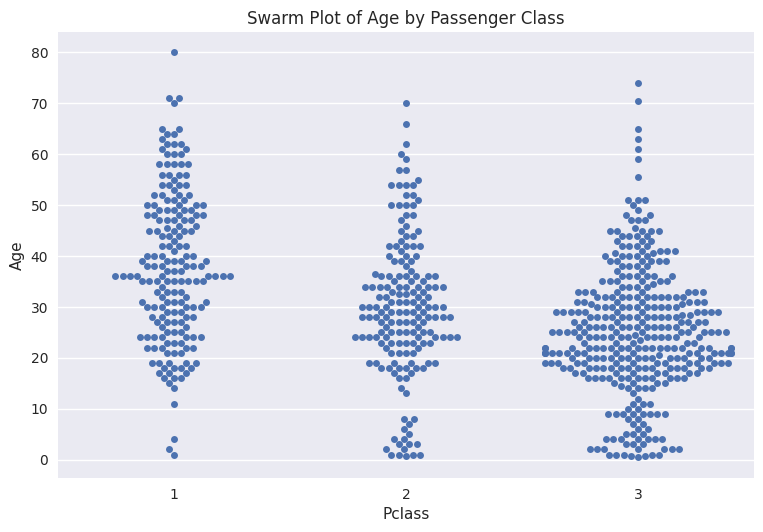

In [72]:
sns.swarmplot(x='Pclass', y='Age', data=df)
plt.title('Swarm Plot of Age by Passenger Class')
plt.show()

/tmp/ipykernel_43/3118836039.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Pclass', y='Age', data=df, ci='sd')


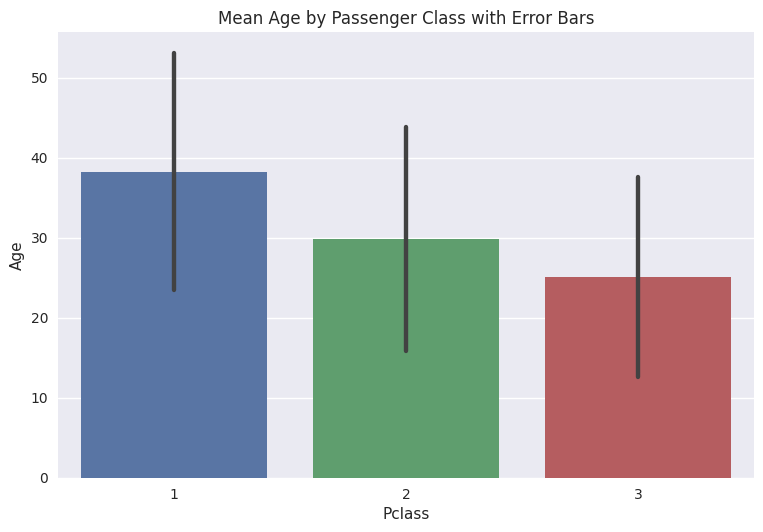

In [73]:
sns.barplot(x='Pclass', y='Age', data=df, ci='sd')
plt.title('Mean Age by Passenger Class with Error Bars')
plt.show()

In [79]:
age = df2.groupby('Pclass')['Age']
df2['Age'] = age.transform(lambda x: x.fillna(x.median()))
df2['Age'].isnull().sum()

0

In [81]:
df2.dropna(inplace=True)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    float64
 8   Survived     889 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 69.5 KB


In [85]:
df2.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

In [89]:
X=df2[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y=df2['Survived']

# Fitting the models

In [90]:
#Linear Regression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [93]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X,y)

DecisionTreeRegressor()

In [95]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [98]:
#Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X,y)

GradientBoostingRegressor()

In [101]:
#SVM
svr = SVR()
svr.fit(X,y)

SVR()

In [145]:
#KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X,y)

KNeighborsRegressor()

# Preprocessing the test data

In [111]:
print('Test Data')
test_cols_to_drop=['Name','Ticket','Cabin']
df_t.drop(columns=test_cols_to_drop,inplace=True)
df_t.head()

Test Data


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [116]:
df_t['Sex']=df_t['Sex'].replace({'male':0,'female':1})
df_t['Embarked']=df_t['Embarked'].replace({'Q':0,'S':1,'C':2})

In [119]:
age = df_t.groupby('Pclass')['Age']
df_t['Age'] = age.transform(lambda x: x.fillna(x.median()))
df_t['Age'].isnull().sum()

0

In [121]:
df_t.dropna(inplace=True)

In [123]:
#Test Data info
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


In [124]:
df_t.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [128]:
X_test = df_t

# Predictions

In [146]:
#Predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)
gb_pred = gb.predict(X_test)
svr_pred = svr.predict(X_test)

# Evaluation Metrics

In [147]:
y[:417]

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    1
417    1
Name: Survived, Length: 417, dtype: int64

In [148]:
print(f'''True values : {y[:417].shape}
\nPredicted Values : {lr_pred.shape}''' )

True values : (417,)

Predicted Values : (417,)


In [149]:
#Evaluation Metrics
lr_e = mean_absolute_error(y[:417],lr_pred)
dt_e = mean_absolute_error(y[:417],dt_pred)
rf_e = mean_absolute_error(y[:417],rf_pred)
svr_e = mean_absolute_error(y[:417],svr_pred)
gb_e=mean_absolute_error(y[:417],gb_pred)
knn_e=mean_absolute_error(y[:417],knn_pred)

In [150]:
mae_list = [lr_e,dt_e,rf_e,svr_e,gb_e]
model_names =['Linear Regression','Decision Tree','Random Forest','SVM','Gradient Boosting']

In [153]:
for i,li in enumerate(mae_list):
    print(f''' {i} : {li} ''')

 0 : 0.5032069209321224 
 1 : 0.5227817745803357 
 2 : 0.49004796163069547 
 3 : 0.4309132939961441 
 4 : 0.5029459807517385 
 5 : KNeighborsRegressor() 
